In [1]:
from matplotlib import font_manager, rc

font_path = '/Windows/Fonts/batang.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import requests
import bs4

url = 'https://news.daum.net/'
res = requests.get(url)

# print(res.text)

soup = bs4.BeautifulSoup(res.text)
# print(soup)

# data = soup.select('a')
# data = soup.find('a')   # 첫번째 1줄만 가져옴
data = soup.find_all('a')
# print(data)

In [3]:
category_url = {
    '메인' : ['https://news.daum.net/'],
    '사회' : ['https://news.daum.net/society'],
    '정치' : ['https://news.daum.net/politics'],
    '경제' : ['https://news.daum.net/economic'],
    '국제' : ['https://news.daum.net/foreign'],
    '문화' : ['https://news.daum.net/culture'],
    'IT' : ['https://news.daum.net/digital'],
}

In [4]:
for i, j in category_url.items() :
    res = requests.get(j[0])
    j.append(res.text)

In [5]:
# print(category_url)

In [6]:
# print(category_url['문화'])

In [69]:
temp = []

for i, j in category_url.items() :
    soup = bs4.BeautifulSoup(j[1])
    
    for n in soup.find_all('span', attrs={'class':'info_cp'}) :
        temp.append(n.text.strip())
        
    for n in soup.find_all('span', attrs={'class':'info_thumb'}) :
        if n.find('a') == None :
            if '\n' in n.text.strip() :
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '' :
                temp.append(n.find('img', alt=True)['alt'])
            else :
                temp.append(n.text.strip())

In [70]:
print(temp, len(temp))

['사회', '사회', '경제', '경제', '정치', '사회', '국제', '정치', '국제', '경제', '경제', '사회', '정치', '국제', '정치', 'IT', '경제', '사회', '정치', '경제', 'YTN', '노컷뉴스', 'SBS', '지디넷코리아', '한겨레21', '데일리안', '전자신문', '머니투데이', '머니투데이', '뉴시스', '매일경제', '연합뉴스', '강원도민일보', '연합뉴스', '매일경제', '뉴스1', '노컷뉴스', '뉴스1', '연합뉴스', '뉴시스', '머니투데이', '시사저널', '연합뉴스', '뉴스1', 'YTN', '오마이뉴스', '노컷뉴스', 'SBS', '한겨레21', 'SBS', '서울신문', 'KBS', 'YTN', '한국일보', '더팩트', '뉴시스', '뉴스1', '뉴시스', '오마이뉴스', '조선일보', '머니투데이', '한국일보', '뉴스1', 'YTN', '뉴스1', '서울신문', 'JTBC', '뉴스1', '연합뉴스', '뉴스1', 'kbc광주방송', 'SBS', '시사IN', '오마이뉴스', '서울신문', 'MBN', 'KBS', '채널A', '머니투데이', '뉴스1', '조선비즈', '비즈니스워치', '이데일리', '뉴스1', '연합뉴스', '파이낸셜뉴스', '뉴스1', '매일경제', '조선비즈', '더스쿠프', '뉴스1', '국제신문', '데일리안', '뉴스1', '채널A', '한국경제', '한국경제', 'SBS', 'JTBC', '헤럴드경제', '한국경제TV', '서울경제', 'SBS Biz', '뉴스1', '뉴스1', '연합뉴스', '연합뉴스', '국민일보', '연합뉴스', '한겨레', '연합뉴스', '조선일보', '한겨레', '조선비즈', '국제신문', '뉴시스', '머니투데이', '뉴스1', '아시아경제', '뉴시스', '세계일보', '서울경제', 'SBS', '서울신문', 'KBS', 'KBS', '서울신문', '오마이뉴스', '서울신문', '한국일보', '동아일보', 'SB

In [71]:
# print(category_url['IT'])

In [72]:
temp_a = []
soup = bs4.BeautifulSoup(category_url['IT'][1])
for i in soup.find_all('span', attrs={'class':'info_thumb'}) :
    if i.find('a') == None :
        print(i.text.strip())
        temp_a.append(i.text.strip())
    
print(temp_a)

서울경제
뉴시스
지디넷코리아
연합뉴스
전자신문
국제신문
한국경제
IT동아
아이뉴스24
한국경제
조선비즈
조선일보
전자신문
이데일리
아이뉴스24
['서울경제', '뉴시스', '지디넷코리아', '연합뉴스', '전자신문', '국제신문', '한국경제', 'IT동아', '아이뉴스24', '한국경제', '조선비즈', '조선일보', '전자신문', '이데일리', '아이뉴스24']


In [7]:
for i, j in category_url.items() :
    soup = bs4.BeautifulSoup(j[1])
    # 언론사 리스트
    temp = []
    
    for n in soup.find_all('span', attrs={'class':'info_cp'}) :
        temp.append(n.text.strip())
        
    for n in soup.find_all('span', attrs={'class':'info_thumb'}) :
        if n.find('a') == None :
            if '\n' in n.text.strip() :
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '' :
                temp.append(n.find('img', alt=True)['alt'])
            else :
                temp.append(n.text.strip())
        
    j.append(temp)

In [11]:
print(category_url['IT'][2])

['연합뉴스', '머니투데이', '더팩트', '경향신문', '전자신문', '머니투데이', '뉴시스', '국민일보', '지디넷코리아', '뉴시스', '게임동아', '지디넷코리아', '머니투데이', '비즈니스워치', '아이뉴스24', '아이뉴스24', '아이뉴스24', '한국경제', 'IT동아', '한국경제', '조선비즈', '조선일보', '전자신문', '이데일리', '아이뉴스24']


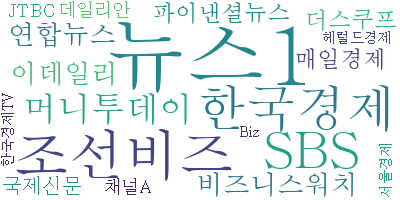

In [75]:
import wordcloud

text = ' '.join(category_url['경제'][2])

# print(text)
wc = wordcloud.WordCloud(font_path=font_path, background_color='white')
wc.generate_from_text(text)
wc.to_image()

In [8]:
import requests
import bs4

url = 'https://new.daum.net/'
res = requests.get(url)

In [8]:
# 모든 언론사 리스트
data=[]
for i, j in category_url.items() :
    if i != '메인' :
        data.extend(j[2])

unique_data = list(set(data))

print(unique_data)


['강원도민일보', 'JTBC', '조선일보', '비즈니스워치', '베이비뉴스', 'YTN', '중앙일보', '헬스조선', '웨딩21뉴스', 'KBS', '국민일보', '머니S', '아이뉴스24', '경향신문', '한국일보', '지디넷코리아', '뉴시스', '연합뉴스TV', '채널A', '연합뉴스', '조선비즈', '서울신문', '코메디닷컴', '오마이뉴스', '뉴스1', '디지털타임스', '시사저널', '헤럴드경제', 'IT동아', '시사IN', 'SBS', 'MBC', '한겨레', '게임동아', '파이낸셜뉴스', '세계일보', '대전일보', 'kbc광주방송', '한국경제', '더팩트', 'SBS Biz', '하이닥', '코스모폴리탄', 'JIBS', '미디어오늘', '전자신문', '머니투데이', '서울경제', '매일경제', 'CJB청주방송', '이데일리', '키즈맘']


In [9]:
# 분야별
rank = {}
for i in unique_data :
    rank[i]=0

for i in category_url['IT'][2] :
    rank[i] += 1    
    
print(rank)

{'강원도민일보': 0, 'JTBC': 0, '조선일보': 1, '비즈니스워치': 1, '베이비뉴스': 0, 'YTN': 0, '중앙일보': 0, '헬스조선': 0, '웨딩21뉴스': 0, 'KBS': 0, '국민일보': 1, '머니S': 0, '아이뉴스24': 4, '경향신문': 1, '한국일보': 0, '지디넷코리아': 2, '뉴시스': 1, '연합뉴스TV': 0, '채널A': 0, '연합뉴스': 1, '조선비즈': 1, '서울신문': 0, '코메디닷컴': 0, '오마이뉴스': 0, '뉴스1': 0, '디지털타임스': 0, '시사저널': 0, '헤럴드경제': 0, 'IT동아': 2, '시사IN': 0, 'SBS': 0, 'MBC': 0, '한겨레': 0, '게임동아': 1, '파이낸셜뉴스': 0, '세계일보': 0, '대전일보': 0, 'kbc광주방송': 0, '한국경제': 2, '더팩트': 1, 'SBS Biz': 0, '하이닥': 0, '코스모폴리탄': 0, 'JIBS': 0, '미디어오늘': 0, '전자신문': 2, '머니투데이': 3, '서울경제': 0, '매일경제': 0, 'CJB청주방송': 0, '이데일리': 1, '키즈맘': 0}


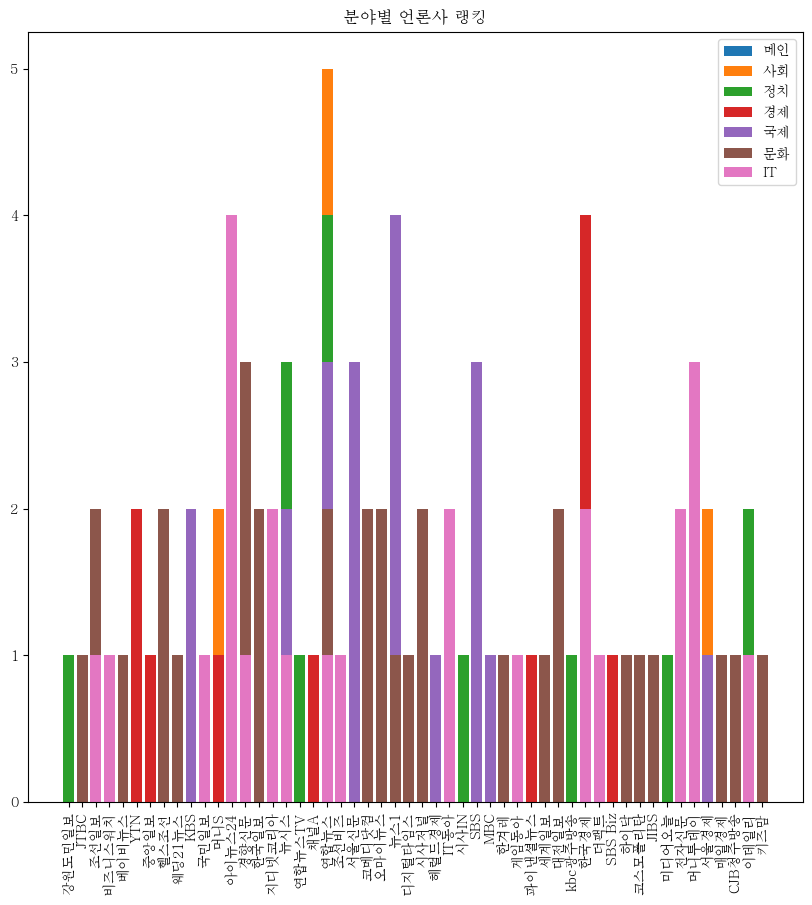

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in category_url.keys() :
    rank = {}
    
    for j in unique_data :
        rank[j] = 0
    
    for j in category_url[i][2] :
        if i == '메인' :
            continue
        rank[j] += 1
        
    x = rank.keys()
    y = rank.values()
    plt.bar(x, y, label=i)
    
plt.xticks(rotation=90)
plt.legend()
plt.title('분야별 언론사 랭킹')
plt.show()

In [82]:
# 전체 데이터 출력
print(data)

['머니투데이', '뉴시스', '매일경제', '연합뉴스', '강원도민일보', '연합뉴스', '매일경제', '뉴스1', '노컷뉴스', '뉴스1', '연합뉴스', '뉴시스', '머니투데이', '시사저널', '연합뉴스', '뉴스1', 'YTN', '오마이뉴스', '노컷뉴스', 'SBS', '한겨레21', 'SBS', '서울신문', 'KBS', 'YTN', '한국일보', '더팩트', '뉴시스', '뉴스1', '뉴시스', '오마이뉴스', '조선일보', '머니투데이', '한국일보', '뉴스1', 'YTN', '뉴스1', '서울신문', 'JTBC', '뉴스1', '연합뉴스', '뉴스1', 'kbc광주방송', 'SBS', '시사IN', '오마이뉴스', '서울신문', 'MBN', 'KBS', '채널A', '머니투데이', '뉴스1', '조선비즈', '비즈니스워치', '이데일리', '뉴스1', '연합뉴스', '파이낸셜뉴스', '뉴스1', '매일경제', '조선비즈', '더스쿠프', '뉴스1', '국제신문', '데일리안', '뉴스1', '채널A', '한국경제', '한국경제', 'SBS', 'JTBC', '헤럴드경제', '한국경제TV', '서울경제', 'SBS Biz', '뉴스1', '뉴스1', '연합뉴스', '연합뉴스', '국민일보', '연합뉴스', '한겨레', '연합뉴스', '조선일보', '한겨레', '조선비즈', '국제신문', '뉴시스', '머니투데이', '뉴스1', '아시아경제', '뉴시스', '세계일보', '서울경제', 'SBS', '서울신문', 'KBS', 'KBS', '서울신문', '오마이뉴스', '서울신문', '한국일보', '동아일보', 'SBS', '서울경제', '뉴시스', '농민신문', '헤럴드경제', '문화일보', '더스쿠프', '이데일리', '코메디닷컴', '한겨레21', '데일리안', 'JIBS', '머니S', '베이비뉴스', '키즈맘', '로피시엘 코리아', '헬스조선', '한겨레21', '코메디닷컴', '웨딩21뉴스', '엘르', 'JTBC', '대전일보',

In [91]:
# 전체 랭킹
rank = {}

for i in data:
    if rank.get(i) == None :
        rank[i] = 1
    else:
        rank[i] += 1

print(rank)

{'머니투데이': 6, '뉴시스': 9, '매일경제': 3, '연합뉴스': 11, '강원도민일보': 1, '뉴스1': 18, '노컷뉴스': 2, '시사저널': 1, 'YTN': 3, '오마이뉴스': 4, 'SBS': 6, '한겨레21': 3, '서울신문': 6, 'KBS': 4, '한국일보': 3, '더팩트': 1, '조선일보': 5, 'JTBC': 3, 'kbc광주방송': 1, '시사IN': 1, 'MBN': 1, '채널A': 2, '조선비즈': 4, '비즈니스워치': 1, '이데일리': 3, '파이낸셜뉴스': 2, '더스쿠프': 2, '국제신문': 3, '데일리안': 3, '한국경제': 4, '헤럴드경제': 3, '한국경제TV': 1, '서울경제': 4, 'SBS Biz': 1, '국민일보': 1, '한겨레': 3, '아시아경제': 1, '세계일보': 2, '동아일보': 1, '농민신문': 1, '문화일보': 1, '코메디닷컴': 2, 'JIBS': 1, '머니S': 1, '베이비뉴스': 1, '키즈맘': 1, '로피시엘 코리아': 1, '헬스조선': 1, '웨딩21뉴스': 1, '엘르': 1, '대전일보': 2, '경향신문': 3, '디지털타임스': 1, '지디넷코리아': 2, '전자신문': 2, 'IT동아': 1, '아이뉴스24': 2}


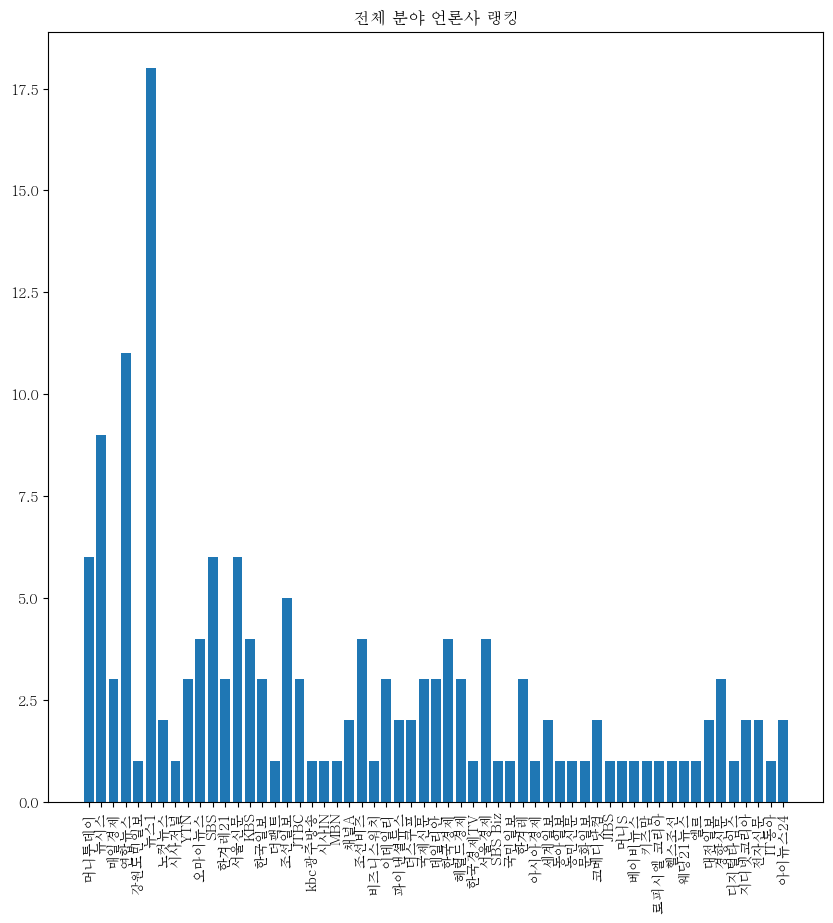

In [92]:
plt.figure(figsize=(10, 10))

x = rank.keys()
t = rank.values()

plt.bar(x, y)
plt.xticks(rotation = 90)
plt.title('전체 분야 언론사 랭킹')
plt.show()

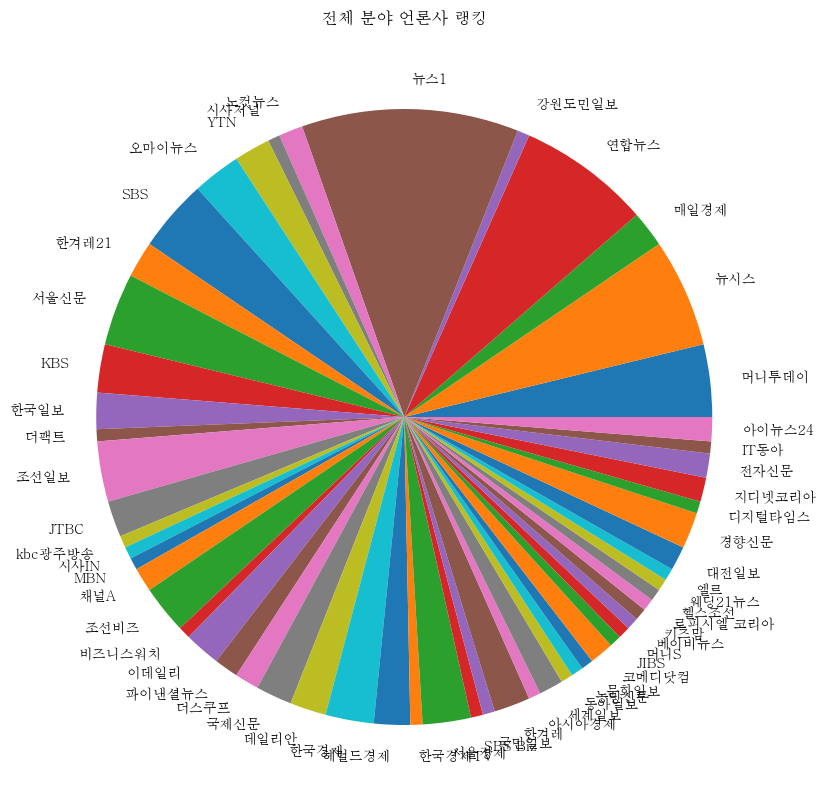

In [93]:
plt.figure(figsize=(10, 10))

x = rank.keys()
t = rank.values()

plt.pie(y, labels=x)

plt.title('전체 분야 언론사 랭킹')
plt.show()